# Mercedes benz test bench time prediction

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn import preprocessing
from sklearn import metrics
#make interactive shell to print all statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




### DataSet Description
   This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.
The ground truth is labeled ‘y’ and represents the **time (in seconds)** that the car took to pass **testing** for each variable.


In [14]:
set_local_path="C:/NEERAJA/PERSONAL/Trainings/UpX/Machine_Learning/attachment_attachment_ML_attachment_Project/mercedes-benz-greener-manufacturing-20180217T185852Z-001/mercedes-benz-greener-manufacturing//"

In [16]:
train_data=pd.read_csv(set_local_path+"train/train.csv")
test_data=pd.read_csv(set_local_path+"test/test.csv")

## Describe the dataset

In [17]:
train_data.head()


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
train_data.info
train_data.shape

(4209, 378)

### The dataset consists of huge number of dimensions. First run PCA to reduce the curse of dimensionality
### PCA

   Principal component analysis is a statistical procedure that uses an **orthogonal transformation** to convert a set of 
observations of possibly **correlated variables** into a set of values of linearly uncorrelated variables called
principal components.

#### With PCA we can reduce the dimentions with out losing much information
#### PCA also helps to remove the multicollinearity between the variables


In [24]:
# store Y values and remove it from the train set
target = train_data['y']
train_data.drop('y', axis=1, inplace=True)


In [25]:
train_data.shape

(4209, 377)

In [27]:
target.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [28]:
train_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


#### Dataset has categorical values, hence dummy code the values to get numericals

In [32]:
for col in train_data.columns:
    if train_data[col].dtype == "object":
        train_data[col] = pd.Categorical(train_data[col]).codes
        
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), int8(8)
memory usage: 11.9 MB


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


**We can observe that all the categorical values are given numerical numbers**

### Now Standardize the dimensions before applying PCA

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(train_data)

In [35]:
# apply PCA on scaled values

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
print (pca.explained_variance_ratio_)

[  6.87384486e-02   5.67283084e-02   4.52510465e-02   3.41738590e-02
   3.25538323e-02   3.15418578e-02   2.85471262e-02   2.11817663e-02
   1.96863310e-02   1.77893503e-02   1.63562978e-02   1.56009983e-02
   1.45906030e-02   1.44564755e-02   1.34495596e-02   1.29257331e-02
   1.24138205e-02   1.17139363e-02   1.11912605e-02   1.07496090e-02
   9.89891380e-03   9.67760321e-03   9.40045751e-03   9.08605429e-03
   8.72347187e-03   8.40759803e-03   7.92761993e-03   7.61388789e-03
   7.34903377e-03   7.18304967e-03   6.91226562e-03   6.75052104e-03
   6.55057087e-03   6.46544442e-03   6.21347862e-03   6.00246073e-03
   5.86650100e-03   5.74454073e-03   5.62534299e-03   5.55771245e-03
   5.50145016e-03   5.38603020e-03   5.32448904e-03   5.23215509e-03
   5.11352399e-03   5.01856856e-03   4.97724151e-03   4.77275686e-03
   4.65790330e-03   4.59136569e-03   4.46221069e-03   4.37329823e-03
   4.31692752e-03   4.29122103e-03   4.22545368e-03   4.18909864e-03
   4.13147756e-03   4.05572055e-03

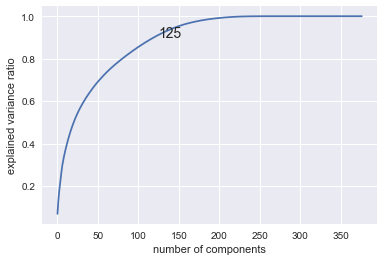

In [38]:
# plot the explained values
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("explained variance ratio")
plt.xlabel("number of components")
plt.style.use('fivethirtyeight')
plt.annotate(125, xy=(125, .90))

** From above graph, we can conclude that 125 components are explaining the 90% of the variance in the data. Hence we choose the 125 components for further analysis**

In [40]:
# select the 125 components
x_pca = PCA(n_components=125)
train_pca = x_pca.fit_transform(X_std)

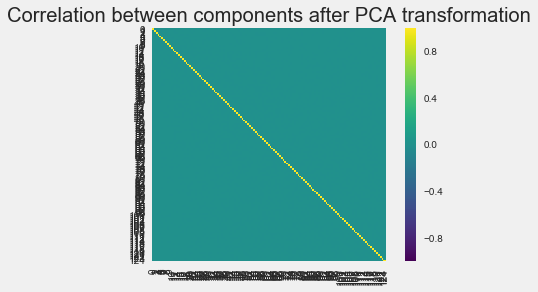

In [42]:
#corretion between components after transforming
correlation = pd.DataFrame(PCA(n_components=125).fit_transform(X_std)).corr()
sns.heatmap(correlation, vmax=1, square=True, cmap='viridis')
plt.title("Correlation between components after PCA transformation")


** above plot shows that correlation is 0 hence it is proved that multicollinearity is removed after PCA**

### Apply Random Forest to get accuracy

In [56]:
# apply random forest

from sklearn.ensemble import RandomForestRegressor
import time
rfRegressor = RandomForestRegressor(max_depth = 30, min_samples_split=2, n_estimators=50, random_state=1)
start_time = time.time()
rfRegressor.fit(train_pca, target)
end_time = time.time()
print("Time taken to run random forest {}".format(end_time-start_time))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

Time taken to run random forest 30.47413969039917


**RF fit algorithm is ran for max_depth values of 5, 10, 15, 20**
   ** with  15, it got a accuracy of 0.87 **
   ** with  20, the accuarcy is 0.90 **
   ** with  25, the accuracy is 0.91 **



In [57]:
# check the accuracy
rfRegressor.score(train_pca, target)

0.91839172958344628

In [61]:
pd.crosstab(target, 1)


col_0,1
y,
72.11,1
72.50,1
72.94,1
73.02,1
73.15,1
73.24,1
73.25,1
73.34,1
73.36,1


In [62]:
# dummy code test data to convert categorical values to numerical
for col in test_data:
    if test_data[col].dtype == "object":
        test_data[col] = pd.Categorical(test_data[col]).codes
        
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
# Now test the model

# First transform theinput for the test
#consider first 125 components as they are explaining the 90% of variation in the data
test_pca = x_pca.fit_transform(test_data)
test_pred = rfRegressor.predict(test_pca)



In [102]:
# Get ID and predicted values
a = pd.DataFrame(test_data['ID'])
b = pd.DataFrame(test_pred)

a.shape
b.shape
Final_result = pd.concat([a,b], axis=1)
Final_result.shape
Final_result


(4209, 1)

(4209, 1)

(4209, 2)

,ID,0
0,1,79.212400
1,2,113.023600
2,3,79.399000
3,4,80.534600
4,5,110.969600
5,8,107.363400
6,10,111.159000
7,11,113.071000
8,12,77.854600
9,14,108.801800


In [99]:
Final_result.to_csv(set_local_path+"Mercedez_test_prediction.csv", sep=',')